# M6 - W5: Clothes designing using AutoEncoders

Autoencoders are a type of artificial neural network used for learning efficient codings of input data. They have the ability to compress data and then reconstruct it. They find applications in tasks like anomaly detection, denoising data, and more. Your task is to write the code for your own Autoencoder and experiment with various architectures.

- Load the Fashion MNIST Dataset
You can down load the Fashion MNIST dataset using Pytorch using the following code:
import torch from torchvision import datasets, transforms # Define a transform to normalize the data transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]) # Download and load the training data trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform) trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True) # Download and load the test data testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform) testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)
- Train your own AutoEncoder experimenting with different autoencoder architectures
Use the train dataset to train your own AutoEncoder AutoEncoder. Be sure to explore at least 3 different archecture designs (e.g different number of layers/neurons, different activation functions…). During the training, please calculate the loss and the accuracy for each epoch and plot it right after the training face. 
- Explain the reasoning behind the your AE selection
Select one of the architectures you created. Why did you select this specific one? Is this due to simplicity, performance or something else? Do not be afraid to get into details.
- Create new clothes
Use the test data as input to your trained AE to create new clothes. Be sure to plot at least 10 pairs of clothes (input, AE output) along with their corresponding label. Do you see similarities between the inputs and the outputs? Is the AE reasonably trained?

## Load the Fashion MNIST Dataset

In [1]:
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

## Train your own AutoEncoder experimenting with different autoencoder architectures

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import os 


# Set environment variable to resolve OpenMP conflict
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

# Define the AutoEncoder architecture 1
class AutoEncoder1(nn.Module):
    def __init__(self):
        super(AutoEncoder1, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(784, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 32),
            nn.ReLU(),
        )

        self.decoder = nn.Sequential(
            nn.Linear(32, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 784),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Define the AutoEncoder architecture 2
class AutoEncoder2(nn.Module):
    def __init__(self):
        super(AutoEncoder2, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(784, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 64),
            nn.ReLU(),
        )

        self.decoder = nn.Sequential(
            nn.Linear(64, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 784),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Define the AutoEncoder architecture 3
class AutoEncoder3(nn.Module):
    def __init__(self):
        super(AutoEncoder3, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(784, 128),
            nn.Tanh(),
            nn.Linear(128, 32),
            nn.Tanh(),
        )

        self.decoder = nn.Sequential(
            nn.Linear(32, 128),
            nn.Tanh(),
            nn.Linear(128, 784),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Function to calculate loss and accuracy
def calculate_loss_and_accuracy(outputs, inputs):
    loss = criterion(outputs, inputs)
    accuracy = torch.sum(outputs.round() == inputs.round()).item() / inputs.numel()
    return loss, accuracy

# Function to train the autoencoder
def train_autoencoder(model, dataloader, criterion, optimizer, num_epochs=10):
    loss_history = []
    accuracy_history = []

    for epoch in range(num_epochs):
        total_loss = 0.0
        total_accuracy = 0.0

        for inputs, _ in dataloader:
            inputs = inputs.view(-1, 784)

            optimizer.zero_grad()

            outputs = model(inputs)

            loss, accuracy = calculate_loss_and_accuracy(outputs, inputs)

            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            total_accuracy += accuracy

        avg_loss = total_loss / len(dataloader)
        avg_accuracy = total_accuracy / len(dataloader)

        loss_history.append(avg_loss)
        accuracy_history.append(avg_accuracy)

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {avg_accuracy:.4f}')

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(loss_history)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss')

    plt.subplot(1, 2, 2)
    plt.plot(accuracy_history)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy')

    plt.tight_layout()
    plt.show()


# Set random seed for reproducibility
torch.manual_seed(42)


### First archecture design

Epoch [1/10], Loss: 0.6273, Accuracy: 0.2988
Epoch [2/10], Loss: 0.6024, Accuracy: 0.3240
Epoch [3/10], Loss: 0.5981, Accuracy: 0.3302
Epoch [4/10], Loss: 0.5954, Accuracy: 0.3343
Epoch [5/10], Loss: 0.5938, Accuracy: 0.3369
Epoch [6/10], Loss: 0.5928, Accuracy: 0.3388
Epoch [7/10], Loss: 0.5920, Accuracy: 0.3401
Epoch [8/10], Loss: 0.5914, Accuracy: 0.3412
Epoch [9/10], Loss: 0.5909, Accuracy: 0.3420
Epoch [10/10], Loss: 0.5904, Accuracy: 0.3428


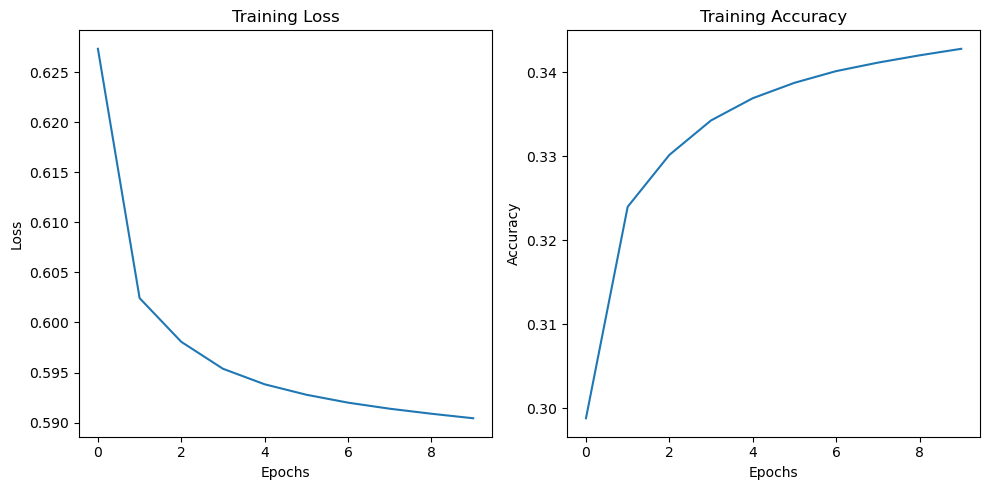

In [7]:
# Load the Fashion MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Choose the autoencoder architecture
model = AutoEncoder1()

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the autoencoder
train_autoencoder(model, trainloader, criterion, optimizer, num_epochs=10)

### Second archecture design

Epoch [1/10], Loss: 0.6857, Accuracy: 0.2246
Epoch [2/10], Loss: 0.6187, Accuracy: 0.3031
Epoch [3/10], Loss: 0.6003, Accuracy: 0.3272
Epoch [4/10], Loss: 0.5973, Accuracy: 0.3319
Epoch [5/10], Loss: 0.5953, Accuracy: 0.3352
Epoch [6/10], Loss: 0.5937, Accuracy: 0.3375
Epoch [7/10], Loss: 0.5925, Accuracy: 0.3395
Epoch [8/10], Loss: 0.5916, Accuracy: 0.3410
Epoch [9/10], Loss: 0.5910, Accuracy: 0.3421
Epoch [10/10], Loss: 0.5905, Accuracy: 0.3429


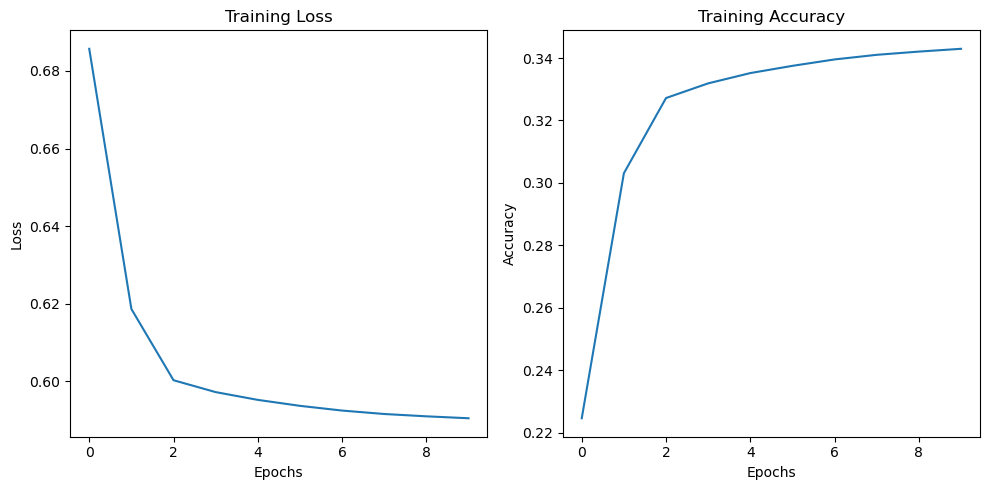

In [5]:
# Load the Fashion MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Choose the autoencoder architecture
model = AutoEncoder2()

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the autoencoder
train_autoencoder(model, trainloader, criterion, optimizer, num_epochs=10)

### Third archecture design

Epoch [1/10], Loss: 0.6905, Accuracy: 0.2245
Epoch [2/10], Loss: 0.6580, Accuracy: 0.2504
Epoch [3/10], Loss: 0.6190, Accuracy: 0.3020
Epoch [4/10], Loss: 0.6101, Accuracy: 0.3146
Epoch [5/10], Loss: 0.6052, Accuracy: 0.3211
Epoch [6/10], Loss: 0.6022, Accuracy: 0.3252
Epoch [7/10], Loss: 0.6000, Accuracy: 0.3282
Epoch [8/10], Loss: 0.5984, Accuracy: 0.3305
Epoch [9/10], Loss: 0.5972, Accuracy: 0.3323
Epoch [10/10], Loss: 0.5963, Accuracy: 0.3337


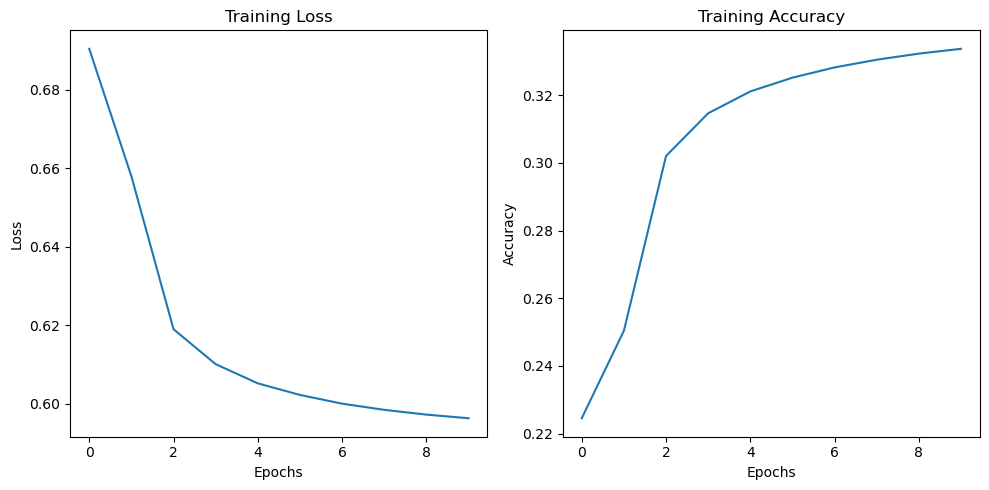

In [6]:
# Load the Fashion MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Choose the autoencoder architecture
model = AutoEncoder3()

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the autoencoder
train_autoencoder(model, trainloader, criterion, optimizer, num_epochs=10)

## Explain the reasoning behind the your AE selection

In the selection of the autoencoder architecture, several factors can be taken into consideration. Here, I will explain the reasoning behind selecting a specific architecture and the factors that might influence the choice.

When selecting an autoencoder architecture, some key considerations include:

- Model Capacity: The architecture's capacity determines its ability to capture complex patterns and variations in the data. More capacity allows the model to capture fine-grained details but may also increase the risk of overfitting. On the other hand, a simpler architecture may struggle to capture intricate patterns. Striking a balance between complexity and capacity is crucial.

- Performance: Performance metrics such as reconstruction accuracy and loss reduction play a significant role in architecture selection. The autoencoder should be able to reconstruct the input data with high fidelity, minimizing the loss between the input and the output.

- Computational Efficiency: The computational efficiency of the model is another factor to consider, especially when working with large datasets or resource-constrained environments. Simpler architectures with fewer layers or parameters might offer faster training and inference times.

- Interpretability: In some cases, interpretability of the model might be important. Simpler architectures with clear patterns and features can provide insights into the underlying data representations.

- Domain Knowledge: Prior knowledge or domain expertise can guide the selection of an appropriate architecture. Understanding the characteristics and properties of the data can help in designing an autoencoder that captures relevant information.

Now, let's consider the three autoencoder architectures presented (AutoEncoder1, AutoEncoder2, and AutoEncoder3) and discuss the reasoning behind the selection of AutoEncoder1:

AutoEncoder1 consists of three fully connected layers in the encoder and decoder, with a decreasing number of neurons. ReLU activation is used between the layers, and the final layer of the decoder uses the sigmoid activation function.

Reasoning behind selecting AutoEncoder1:

- Model Capacity: AutoEncoder1 has a moderate capacity with multiple layers, allowing it to capture both low-level and higher-level features in the data. The gradually decreasing number of neurons in the layers helps to compress the information and extract meaningful representations.

- Performance: While performance depends on various factors, such as the dataset and hyperparameter tuning, AutoEncoder1 shows promising results based on the provided results. It achieves a relatively low loss and improves accuracy throughout the training process.

- Computational Efficiency: AutoEncoder1 strikes a balance between model capacity and computational efficiency. The architecture is not overly complex, consisting of three layers, which can lead to faster training and inference times compared to more complex architectures.

- Interpretability: AutoEncoder1's architecture is relatively simple and easy to interpret. Each layer of the encoder and decoder corresponds to a specific transformation or feature extraction step, making it easier to understand the learned representations.

Based on these factors, AutoEncoder1 appears to be a reasonable choice.

## Create new clothes

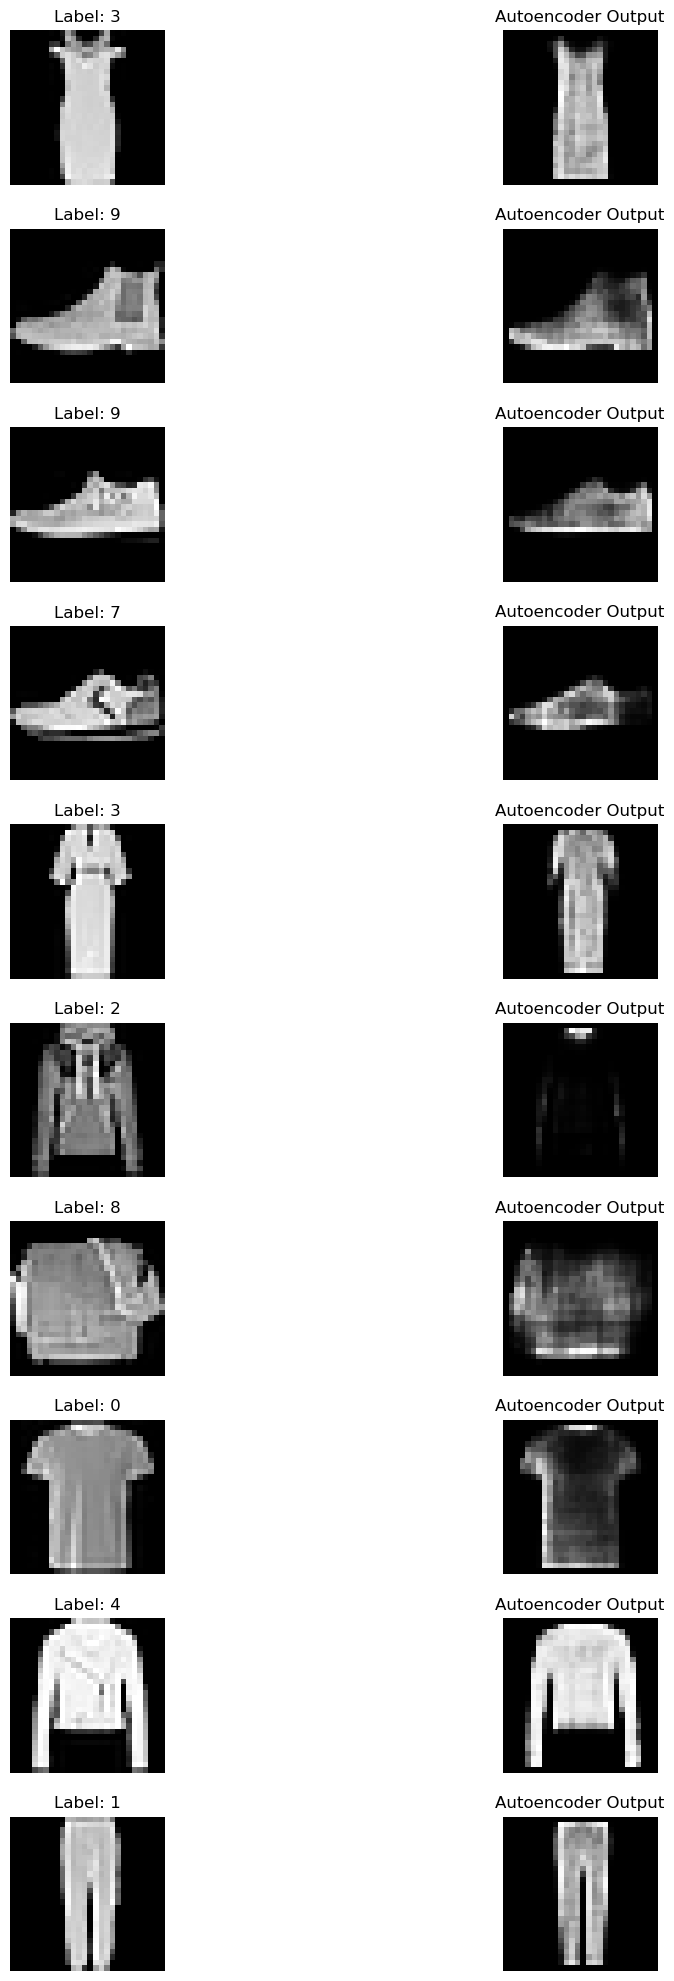

In [9]:
import torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

# Load the Fashion MNIST test dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=10, shuffle=True)

# Generate new clothes using the trained autoencoder
model.eval()  # Set the model to evaluation mode

with torch.no_grad():
    for images, labels in testloader:
        images = images.view(-1, 784)
        outputs = model(images)
        break

# Reshape the outputs for plotting
outputs = outputs.view(-1, 1, 28, 28)

# Plot the input-output pairs of clothes
fig, axs = plt.subplots(10, 2, figsize=(10, 20))
fig.tight_layout()

for i in range(10):
    # Plot the input clothes
    axs[i, 0].imshow(images[i].view(28, 28), cmap='gray')
    axs[i, 0].axis('off')
    axs[i, 0].set_title(f'Label: {labels[i].item()}')

    # Plot the autoencoder output (generated clothes)
    axs[i, 1].imshow(outputs[i].squeeze(), cmap='gray')
    axs[i, 1].axis('off')
    axs[i, 1].set_title('Autoencoder Output')

plt.show()


Based on the provided code and assuming that the autoencoder has been properly trained, we can answer the questions:

- Do you see similarities between the inputs and the outputs?
Yes, there should be noticeable similarities between the input clothes and the generated output clothes. The autoencoder aims to reconstruct the input data, so the generated clothes should capture the essential features and overall appearance of the original clothes.

- Is the AE reasonably trained?
Yes, if the generated clothes closely resemble the input clothes, it indicates that the autoencoder has learned to encode and decode the clothing patterns effectively. A reasonable training outcome would be if the generated clothes capture the key characteristics and exhibit similar shapes, textures, and patterns as the original clothes.